# Intro to image analysis using Skimage, PIL, NumPy, matplotlib, and Pyclesperanto

### The github repo for Pyclesperanto prototype:
https://github.com/clEsperanto/pyclesperanto_prototype

There are helpful guides and tutorials on this page.

### RGB to Haematoxylin-Eosin-DAB (HED) color space conversion followed by nuclei segmentation and analysis

This code separates the immunohistochemical (IHC) staining from the hematoxylin counterstaining

The IHC staining expression of the protein is revealed with diaminobenzidine (DAB) which gives a brown color.

A. C. Ruifrok and D. A. Johnston, “Quantification of histochemical staining by color deconvolution,” Analytical and quantitative cytology and histology / the International Academy of Cytology [and] American Society of Cytology, vol. 23, no. 4, pp. 291-9, Aug. 2001. PMID: 11531144

https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_ihc_color_separation.html#sphx-glr-auto-examples-color-exposure-plot-ihc-color-separation-py

In [27]:
# Read in the relevant libraries:
# Don't forget, you may need to install these!

import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread, imsave, imshow
from skimage import data, io, img_as_ubyte
from skimage.color import rgb2hed, hed2rgb
from skimage.exposure import rescale_intensity

import pandas as pd
import pyclesperanto_prototype as cle

from PIL import Image
from PIL import Image, ImageOps

In [2]:
################################################
##### DO NOT TOUCH THE CODE IN THIS CELL!! #####
################################################

def color_separate(ihc_rgb):

    #Convert the RGB image to HED using the prebuilt skimage method
    
    ihc_hed = rgb2hed(ihc_rgb)
    
    # Create an RGB image for each of the separated stains
    # Convert them to ubyte for easy saving to drive as an image
    
    null = np.zeros_like(ihc_hed[:, :, 0])
    ihc_h = img_as_ubyte(hed2rgb(np.stack((ihc_hed[:, :, 0], null, null), axis=-1)))
    ihc_e = img_as_ubyte(hed2rgb(np.stack((null, ihc_hed[:, :, 1], null), axis=-1)))
    ihc_d = img_as_ubyte(hed2rgb(np.stack((null, null, ihc_hed[:, :, 2]), axis=-1)))

    # Optional fun exercise of combining H and DAB stains into a single image with fluorescence look
    
    h = rescale_intensity(ihc_hed[:, :, 0], out_range=(0, 1),
                          in_range=(0, np.percentile(ihc_hed[:, :, 0], 99)))
    d = rescale_intensity(ihc_hed[:, :, 2], out_range=(0, 1),
                          in_range=(0, np.percentile(ihc_hed[:, :, 2], 99)))
   
    # Cast the two channels into an RGB image, as the blue and green channels
    # Convert to ubyte for easy saving as image to local drive
    
    zdh = img_as_ubyte(np.dstack((null, d, h))) #DAB in green and H in Blue

    return (ihc_h, ihc_e, ihc_d, zdh)

In [28]:
# Read-in the raw image. For now, focus on using jpg images, and not other image extensions like .tiff
# Make sure this image is in the same directory as this jupyter notebook. 
# I suggest saving both to your desktop.

ihc_rgb = imread("ihc_example.jpg")

In [30]:
# Images are arrays of numbers.
# This is how we can view the image array of the image we read in.

ihc_rgb

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

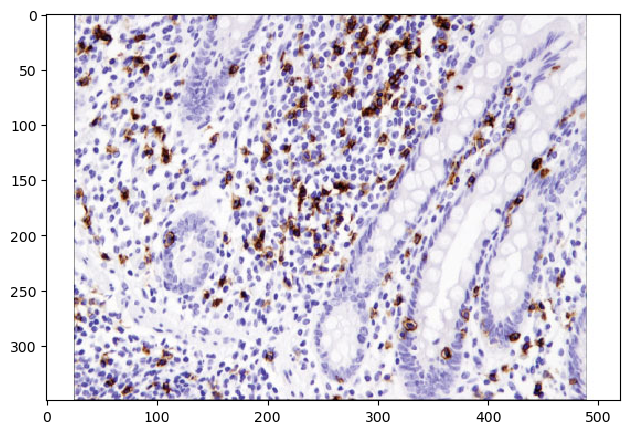

In [32]:
# View the original image in this notebook

imshow(ihc_rgb)

In [6]:
# This image is 350 pixels high, 520 pixels wide, and has 3 channels.
# The 3 channels are red, green, and blue.

ihc_rgb.shape

(350, 520, 3)

In [33]:
# Convert the RGB image to HED using the prebuilt skimage method
# This can be evoked by adding the image variable name (ihc_rgb)
# inside the method (this method is rgb2hed)

# the general format is 'new_variable_name = rgb2hed(picture_variable_name)'

# RGB = red, green, blue
# HED = hematoxylin, eosin, DAB (IHC stain colors)

ihc_hed = rgb2hed(ihc_rgb)

In [8]:
# Create an RGB image for each of the separated stains.
# The only part of this code you need to change 
# is the 'ihc_hed' variable name, which you should change to 
# whatever you named the variable in the previous cell.
    
null = np.zeros_like(ihc_hed[:, :, 0])

# hematoxylin "slice"
ihc_h = img_as_ubyte(hed2rgb(np.stack((ihc_hed[:, :, 0], null, null), axis=-1)))

# eosin "slice"
ihc_e = img_as_ubyte(hed2rgb(np.stack((null, ihc_hed[:, :, 1], null), axis=-1)))

# DAB "slice"
ihc_d = img_as_ubyte(hed2rgb(np.stack((null, null, ihc_hed[:, :, 2]), axis=-1)))

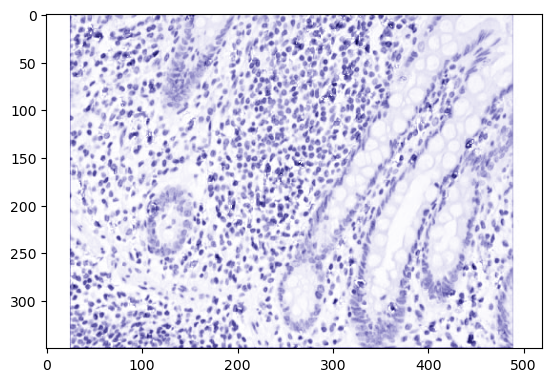

In [34]:
# View each 'slice'

# This is the hematoxylin slice
plt.imshow(ihc_h)

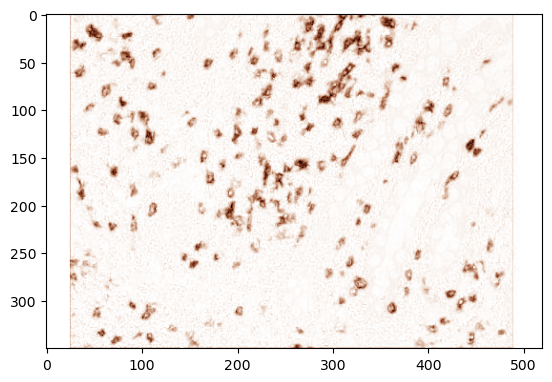

In [35]:
# This is the DAB slice
plt.imshow(ihc_d)

In [37]:
# Instead of the skimage prebuilt method we used above,
# we can also evoke the function in the beginning of this notebook entitled "color_separate"

# To use the function, simply put the variable name of the IHC image you want to analyze into the 
# color_separate function like this:

# This code separates out 4 different variables with H,E,D,HD.  
# As previously mentioned, heme = hematoxylin, eosin = eosin, and dab = dab (the brown stain).  
# We don't need to worry about HD right now.

heme,eosin,dab,HD = color_separate(ihc_rgb)

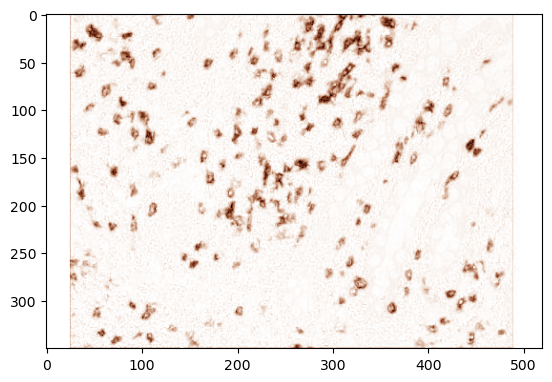

In [38]:
# The DAB slice again, using our function

plt.imshow(dab)

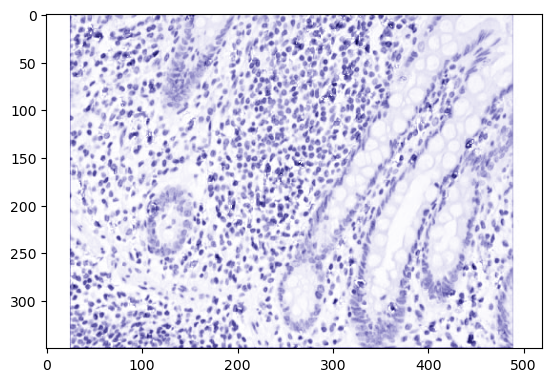

In [39]:
# The hematoxylin slice
plt.imshow(heme)

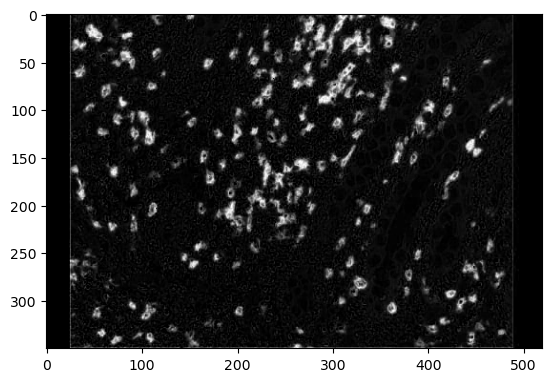

In [40]:
# Since the DAB is usually the stain we are interested in a IHC image analysis, we will focus on analyzing that
# channel.

input_image = np.invert(dab[:,:,2])
plt.imshow(input_image, cmap='gray')

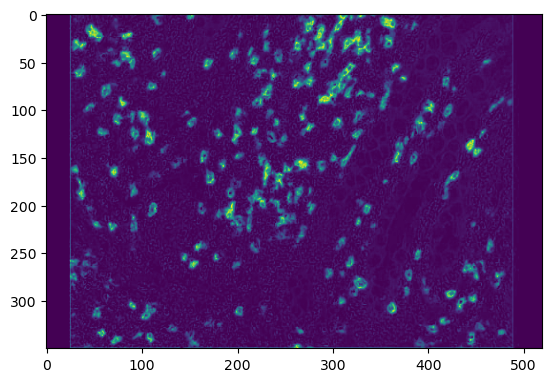

In [41]:
input_image = np.invert(dab[:,:,1])
plt.imshow(input_image)

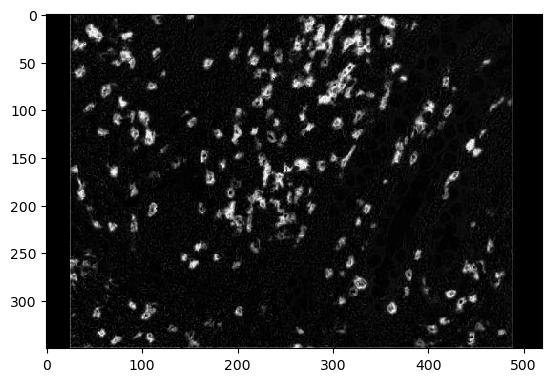

In [16]:
cle.imshow(input_image)

In [42]:
# saving images
plt.imsave('H_img.jpg', heme)
plt.imsave('DAB_img.jpg', dab)

In [18]:
################################################
# Segmentation using Voronoi-Otsu labeling
# For installation instructions of the package, please refer to the following link
# https://github.com/clEsperanto/pyclesperanto_prototype
################################################

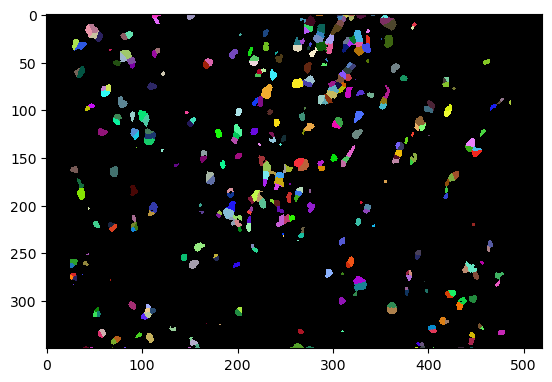

In [43]:
segmented = cle.voronoi_otsu_labeling(input_image, spot_sigma = 1, outline_sigma = 1)
cle.imshow(segmented, labels=True)

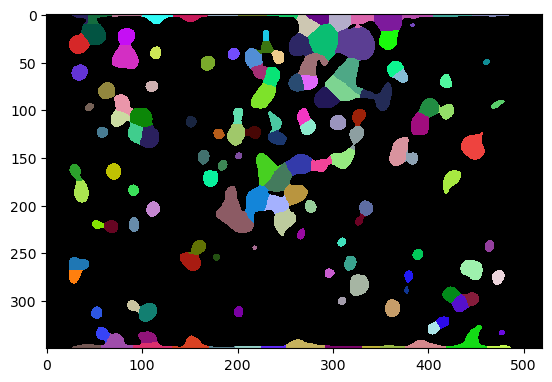

In [44]:
segmented2 = cle.voronoi_otsu_labeling(input_image, spot_sigma = 5, outline_sigma = 5)
cle.imshow(segmented2, labels=True)

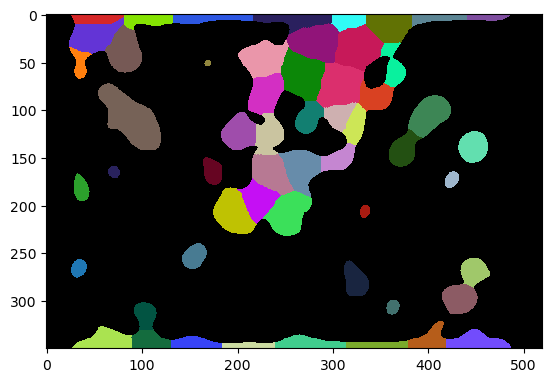

In [45]:
segmented3 = cle.voronoi_otsu_labeling(input_image, spot_sigma = 10, outline_sigma = 10)
cle.imshow(segmented3, labels=True)